Loosely based on armory/tests/test_pytorch/test_framework_dataset

In [70]:
import torch
import matplotlib.pyplot as plt

from armory import paths
from armory.data import datasets
from armory.data import adversarial_datasets

In [71]:
DATASET_DIR = paths.HostPaths().dataset_dir
print(DATASET_DIR)

/root/.armory/datasets


In [72]:
batch_size = 16

clean_ds = datasets.resisc45(
    split_type='test', 
    epochs=1, 
    batch_size=batch_size, 
    dataset_dir=DATASET_DIR,
    framework='pytorch')

assert isinstance(clean_ds, torch.utils.data.DataLoader)
labels, images = next(iter(clean_ds))

In [73]:
adv_ds = adversarial_datasets.resisc45_adversarial_224x224(
    split_type="adversarial",
    epochs=1,
    batch_size=16,
    dataset_dir=DATASET_DIR,
    preprocessing_fn=None,
    cache_dataset=True,
    framework="numpy",
    clean_key="clean",
    adversarial_key="adversarial_univpatch",
    targeted=False,
)

In [74]:
images, labels = next(iter(adv_ds))

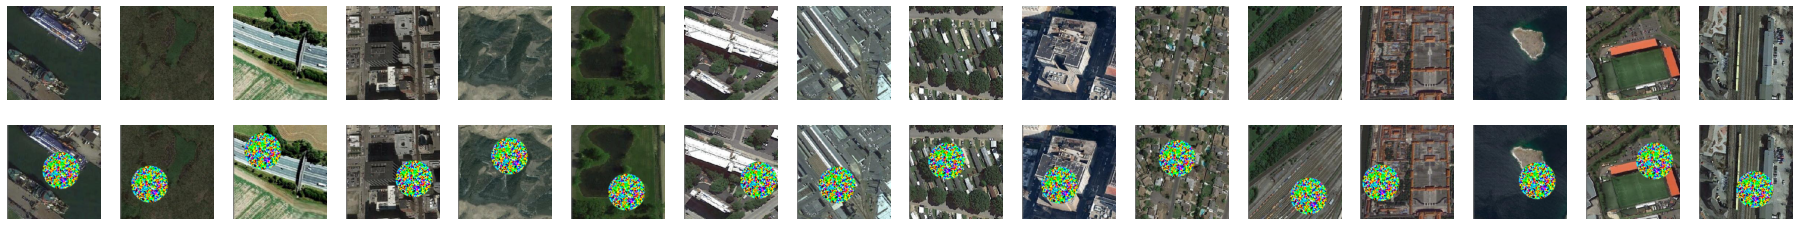

In [82]:
fig, axes = plt.subplots(2, 16, figsize=(32, 4))

for i in range(batch_size):
    axes[0, i].imshow(images[0][i])
    axes[1, i].imshow(images[1][i])
    axes[0, i].axis('off')
    axes[1, i].axis('off')